<h1 align="center">Text Classification on CNAE-9 Data Set</h1>

In this notebook, we build a Text Classification Model on <a href="https://archive.ics.uci.edu/ml/datasets/CNAE-9">CNAE-9 Dataset on UCI.</a>

From the description:

    This is a data set containing 1080 documents of free text business descriptions of Brazilian companies categorized into a subset of 9 categories cataloged in a table called National Classification of Economic Activities (ClassificaÃ§Ã£o Nacional de Atividade EconÃ´micas - CNAE). The original texts were pre-processed to obtain the current data set: initially, it was kept only letters and then it was removed prepositions of the texts. Next, the words were transformed to their canonical form. Finally, each document was represented as a vector, where the weight of each word is its frequency in the document. This data set is highly sparse (99.22% of the matrix is filled with zeros).



In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
%load_ext version_information
%version_information scipy, numpy, pandas, matplotlib, seaborn, version_information

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.2.1
OS Windows 10 10.0.16299 SP0
scipy 1.0.1
numpy 1.12.1
pandas 0.22.0
matplotlib 2.2.2
seaborn 0.8.1
version_information 1.0.3
Tue Apr 17 21:51:26 2018 GMT Daylight Time

# Getting the Data

In [3]:
url = r'https://archive.ics.uci.edu/ml/machine-learning-databases/00233/CNAE-9.data'
count_df = pd.read_csv(url, header=None)

In [4]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Columns: 857 entries, 0 to 856
dtypes: int64(857)
memory usage: 7.1 MB


The result is a 1080\*857 dense matrix. The first column is the label. We extract the first column as the label and convert the rest to a sparse matrix.

In [5]:
from scipy.sparse import csr_matrix
labels, count_features = count_df.loc[:, 0], count_df.loc[:, 1:] 
count_data = csr_matrix(count_features.values)

In [6]:
count_data

<1080x856 sparse matrix of type '<class 'numpy.int64'>'
	with 7233 stored elements in Compressed Sparse Row format>

# Check for Class Imbalance

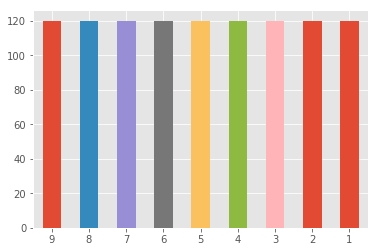

In [7]:
label_counts = pd.Series(labels).value_counts()
label_counts.plot(kind='bar', rot=0)

# Model Construction and Cross-Validation

In this section, we construct a classification model by 

* Perform Singular Value Decomposition of the sparse matrix and keep the top 100 components.
* Use a Maximum Entropy Classifier on the scaled SVD components.

In [8]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [9]:
pipeline = Pipeline(
    [
        ('reducer', TruncatedSVD(n_components=100, random_state=1000)),
        ('scaler', StandardScaler(with_mean=False)),
        ('model', LogisticRegression(max_iter=100, random_state=1234, 
                                     solver='lbfgs', multi_class='multinomial'))
    ]
)

cv = StratifiedKFold(n_splits=10, random_state=1245, shuffle=True)
predictions = cross_val_predict(pipeline, count_data, labels, cv=cv)

cr = classification_report(labels, predictions)
print(cr)

             precision    recall  f1-score   support

          1       0.97      0.97      0.97       120
          2       0.99      0.96      0.97       120
          3       0.94      0.92      0.93       120
          4       0.88      0.89      0.89       120
          5       1.00      0.97      0.99       120
          6       0.88      0.94      0.91       120
          7       0.98      0.95      0.97       120
          8       0.97      0.98      0.98       120
          9       0.88      0.89      0.88       120

avg / total       0.94      0.94      0.94      1080

